In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sim = pd.read_csv('...data/processed/sim_cleaned_data.csv')
df_mit = pd.read_csv('...data/processed/mit_cleaned_data.csv')

print("Both clean datasets are loaded and ready for audit!")

#1. map the MIT Likert HR (1-5) to realistic BPM values (60-100)
#2. this conversion makes the data comparable
hr_map = {1: 65, 2: 70, 3: 80, 4: 90, 5: 95}
df_mit['heart_rate_normalized'] = df_mit ['heart_rate'].map(hr_map).fillna(75)

#converts  1-10 scales to 1-5
def scale_stress(score):
    if score > 5:
        return ((score -1) / 9) * 4 + 1

df_sim['stress_self_report'] = df_sim['stress_self_report'].apply(scale_stress).clip(1, 5)

comparison_df = pd.DataFrame({
    'Metric': [
        'Avg Sleep Hours', 'Avg Heart Rate', 'Avg Stress Score'],
    'Simulated': [
        df_sim['sleep_hours'].mean(),
        df_sim['heart_rate'].mean(),
        df_sim['stress_self_report'].mean()
    ],
    'MIT Benchmark': [
        df_mit['sleep_hours'].mean(),
        df_mit['heart_rate_normalized'].mean(),
        df_mit['stress_self_report'].mean()
    ]
})
print("---CORRECTED STATISTICAL AUDIT---")
print (comparison_df.round(2))

Both clean datasets are loaded and ready for audit!
---CORRECTED STATISTICAL AUDIT---
             Metric  Simulated  MIT Benchmark
0   Avg Sleep Hours       7.00           6.36
1    Avg Heart Rate      70.75          77.89
2  Avg Stress Score       3.83           2.64


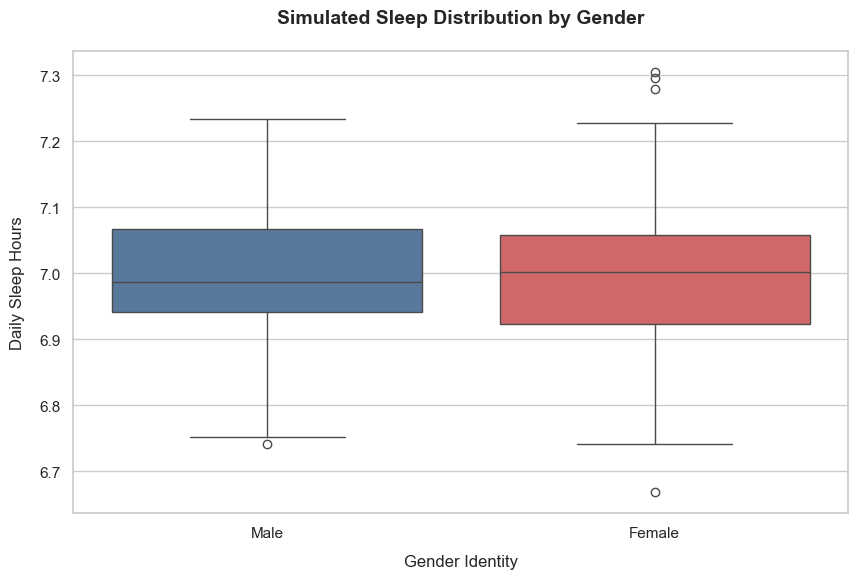

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Formats the figure
sns.set_theme(style="whitegrid")
palette = ["#4e79a7", "#e15759"]

#Creates the figure
plt.figure(figsize=(10, 6))


#Sleep by Gender Box Plot
sns.boxplot(
    data=df_sim, 
    x='gender_bin',
    y='sleep_hours', 
    palette=palette, 
    hue='gender_bin',
    legend=False
)

plt.title('Simulated Sleep Distribution by Gender', pad=20, fontweight='bold', fontsize=14)
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender Identity', labelpad=10)
plt.ylabel('Daily Sleep Hours', labelpad=10)

#Daily Sleep Hours Scatter Plot

plt.show()